In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

import seaborn as sns
import pyrenn
sns.set(style='ticks')

from pickle import load

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from scipy.stats import spearmanr
from matplotlib.pyplot import figure

In [2]:
#Read ANN data and model                                                                                        
activation_function='tanh';train_size=60
sigma=0.06; realization=0                                           
file_data='NN_tanh_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv'
d='../data/' + file_data
d=pd.read_csv(d)

n=0
dn=d[d['rep']==n]
dn=dn[(dn['x1']>=-2.0) & (dn['x1']<=2.0)]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)

print(dn)

      x1         y  rep     noise   y_noise
0  -1.95  0.052185  0.0 -0.131451 -0.079266
1  -1.90  0.056609  0.0 -0.009987  0.046622
2  -1.85  0.061686  0.0 -0.165079 -0.103393
3  -1.80  0.067569  0.0 -0.027823  0.039746
4  -1.75  0.074452  0.0  0.091662  0.166113
..   ...       ...  ...       ...       ...
75  1.80  0.997513  0.0  0.008777  1.006290
76  1.85  0.997161  0.0  0.028734  1.025895
77  1.90  0.996811  0.0 -0.036576  0.960235
78  1.95  0.996446  0.0 -0.049466  0.946980
79  2.00  0.996045  0.0 -0.003852  0.992193

[80 rows x 5 columns]


In [4]:
file_data='NN_tanh_sigma_0.06_r_0_res_0.01_data.csv'
dhr='../data/' + file_data
dhr=pd.read_csv(dhr)

n=0
dnhr=dhr[dhr['rep']==n]
dnhr=dnhr[(dnhr['x1']>=-2.0) & (dnhr['x1']<=2.0)]
dnhr.set_index('Unnamed: 0', inplace=True)
dnhr.index.name = None
dnhr=dnhr.reset_index(drop=True)

display(dnhr)


,x1,y,rep,noise,y_noise
0,-1.99,0.049034,0.0,0.054324,0.103358
1,-1.98,0.049793,0.0,0.038884,0.088677
2,-1.97,0.050570,0.0,-0.070033,-0.019463
3,-1.96,0.051367,0.0,-0.023248,0.028119
4,-1.95,0.052184,0.0,-0.012802,0.039383
...,...,...,...,...,...
395,1.96,0.996346,0.0,0.005605,1.001951
396,1.97,0.996268,0.0,-0.025648,0.970620
397,1.98,0.996188,0.0,0.065598,1.061786
398,1.99,0.996106,0.0,0.100912,1.097018


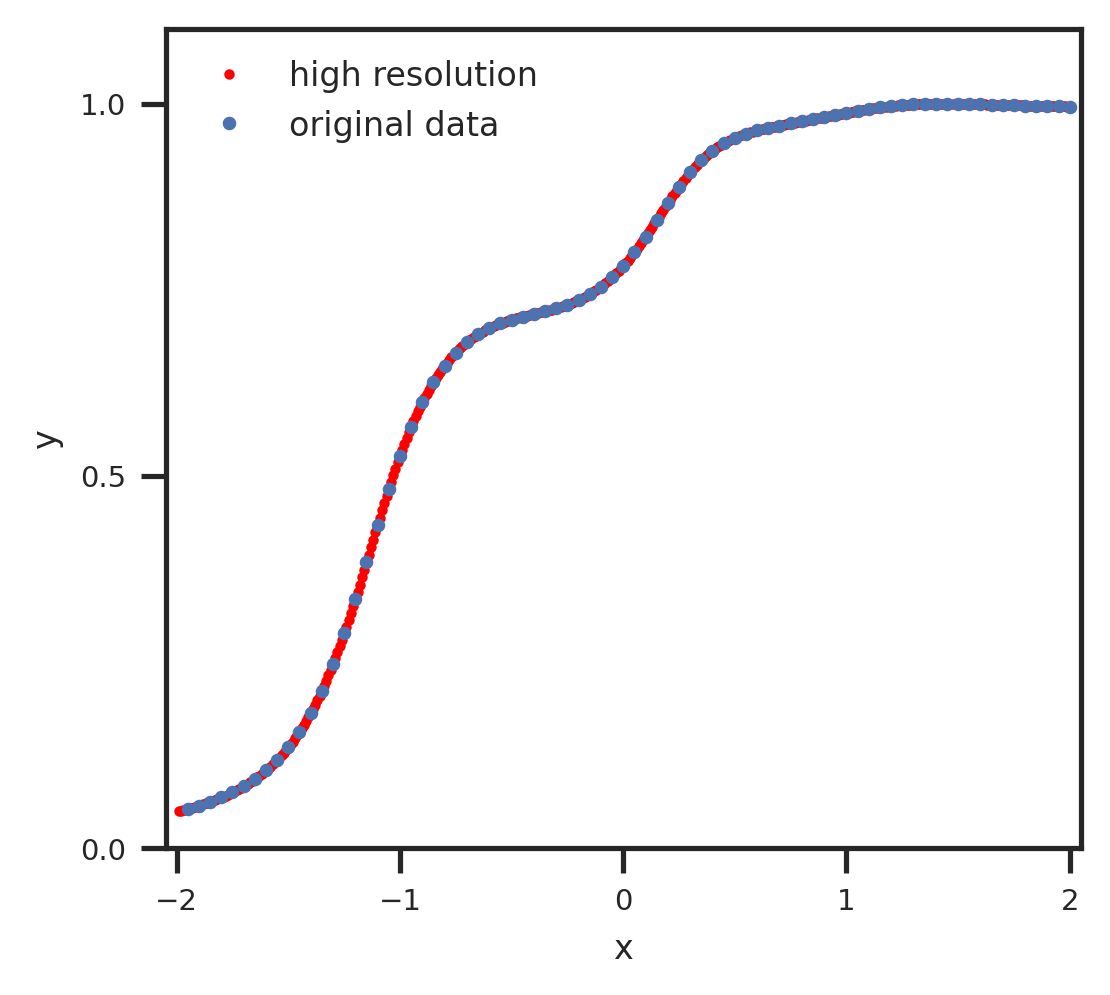

In [5]:
#Figure settings
output_path='../results/' #A path to save figure
extensions=['.svg', '.png']     #Extensions to save figure
name_fig='fig_interpol'

#Define figure size in cm
cm = 1/2.54 #convert inch to cm
width = 10*cm; height=9*cm 
fig=figure(figsize=(width,height), dpi=300) 

#Fonts and sizes                                                     
size_axis=8;size_ticks=7;size_title=5
line_w=1.5;marker_s=1
line_w=1;marker_s=3 #width and marker size
#--------------------------------

#Plots                                                               
#--------------------------------                                    
plt.plot(dnhr.x1,dnhr.y,'.', color='red', markersize=marker_s, label='high resolution')
plt.plot(dn.x1,dn.y,'.', markersize=marker_s*1.5, label='original data')

#Labels                                                              
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)

#Ticks                                                               
#x_step=5
xtick_labels=[-2, -1, 0 , 1, 2 ]
plt.xticks(xtick_labels, fontsize=size_ticks)
plt.xlim(-2.05,2.05)

#y_step=100
ytick_labels=[ 0, 0.5, 1.0]
plt.yticks(ytick_labels, fontsize=size_ticks)
plt.ylim(0,1.1)

#legend                                                              
plt.legend(loc='best',fontsize=size_axis,frameon=False)

#save fig                                                            
#for ext in extensions:
#plt.savefig(output_path+name_fig+ext,dpi=300)

plt.show()
#-------------------------------- 

In [6]:
#BMS predictions
dinterpol=deepcopy(dnhr)
dinterpol['ybms']=t.predict(x)

NameError: name 't' is not defined

In [27]:

#net = pyrenn.loadNN('../data/trained_nns/' + 'NN_weights_no_overfit_' + activation_function + '_sigma_\
#' + str(sigma) + '_rep_' + str(n) + '_r_' + str(realization) + '.csv')


In [ ]:
#BMS